In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
% matplotlib inline

### This notebook uses Data from Direct Action Everywhere's press page to analyze trends in the number of press hits over time.

# Load Data

In [3]:
press_hits = pd.read_csv("Press archive - Sheet1.csv")

In [4]:
press_hits = press_hits[["Date", "Outlet", "Link to piece", "Title"]]

In [5]:
press_hits["Datetime"] = press_hits.Date.apply(lambda x: pd.to_datetime(x))
press_hits["Year"] = press_hits.Datetime.apply(lambda x: x.isocalendar()[0])
press_hits["Week"] = press_hits.Datetime.apply(lambda x: x.isocalendar()[1])
press_hits["Month"] = press_hits.Datetime.apply(lambda x: x.month)

In [6]:
press_hits

,Date,Outlet,Link to piece,Title,Datetime,Year,Week,Month
0,6/16/2017,Boulder Daily Camera,http://www.dailycamera.com/news/boulder/ci_310...,"""Teen activist in Boulder's Ideal Market meat ...",2017-06-16,2017,24,6
1,6/16/2017,East Bay Times,http://www.eastbaytimes.com/2017/06/16/cattle-...,"""Cattle drive ‘mooves’ through downtown Pleasa...",2017-06-16,2017,24,6
2,6/16/2017,Denver Post,http://www.denverpost.com/2017/06/16/ateret-go...,"""Teen activist accused of ruining $1,000 worth...",2017-06-16,2017,24,6
3,6/16/2017,SF Gate,http://www.sfgate.com/bayarea/article/Here-s-w...,"""Here's why 150 cattle paraded down a busy Eas...",2017-06-16,2017,24,6
4,6/16/2017,Buzzfeed News,https://www.facebook.com/BuzzFeedNews/videos/1...,"""This activist was arrested for rescuing hens ...",2017-06-16,2017,24,6
5,6/8/2017,Sohu.com,https://www.sohu.com/a/147113949_497278,"""Is it against the law to sell chickens in the...",2017-06-08,2017,23,6
6,6/5/2017,Sinovision,https://www.facebook.com/sinovisionofficial/vi...,"""You might heard about the news that Animal Pr...",2017-06-05,2017,23,6
7,6/5/2017,chenjingyu.com,http://www.chenjingyu.com/kylw/2017/0605/3922....,"""Is it against the law to sell chickens in the...",2017-06-05,2017,23,6
8,6/1/2017,Plant Based News,https://www.plantbasednews.org/post/wayne-update,"""Arrested Vegan Activist Wayne Hsiung: You Hav...",2017-06-01,2017,22,6
9,5/31/2017,KTSF Channel 26,https://www.youtube.com/watch?v=dTO1LfozRYw&fe...,"""San Francisco Chinatown live poultry sale con...",2017-05-31,2017,22,5


# Parse year and month from Date column

In [8]:
press_hits["Month Name"] = press_hits.Datetime.apply(lambda x: x.strftime('%B'))

In [9]:
press_hits = press_hits[["Date", "Year", "Month", "Month Name", "Week", "Outlet", "Link to piece", "Title" , "Datetime"]]

In [17]:
year_totals = press_hits.groupby(['Year'])['Title'].count().reset_index()
year_totals = year_totals[1:]

In [11]:
year_totals = year_totals.rename(columns= {'Title': 'Total'})
year_totals = year_totals.set_index('Year')

In [12]:
press_hits_17 = press_hits[press_hits.Year == 2017]
press_hits_16 = press_hits[press_hits.Year == 2016]
press_hits_15 = press_hits[press_hits.Year == 2015]
press_hits_14 = press_hits[press_hits.Year == 2014]
press_hits_13 = press_hits[press_hits.Year == 2013]


# Create a table per year and aggregate totals

In [13]:
press_hits_17 = press_hits_17.groupby(['Month'])['Title'].count()
press_hits_16 = press_hits_16.groupby(['Month'])['Title'].count()
press_hits_15 = press_hits_15.groupby(['Month'])['Title'].count()
press_hits_14 = press_hits_14.groupby(['Month'])['Title'].count()
press_hits_13 = press_hits_13.groupby(['Month'])['Title'].count()

# Plot

In [14]:
months= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
my_xticks = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']


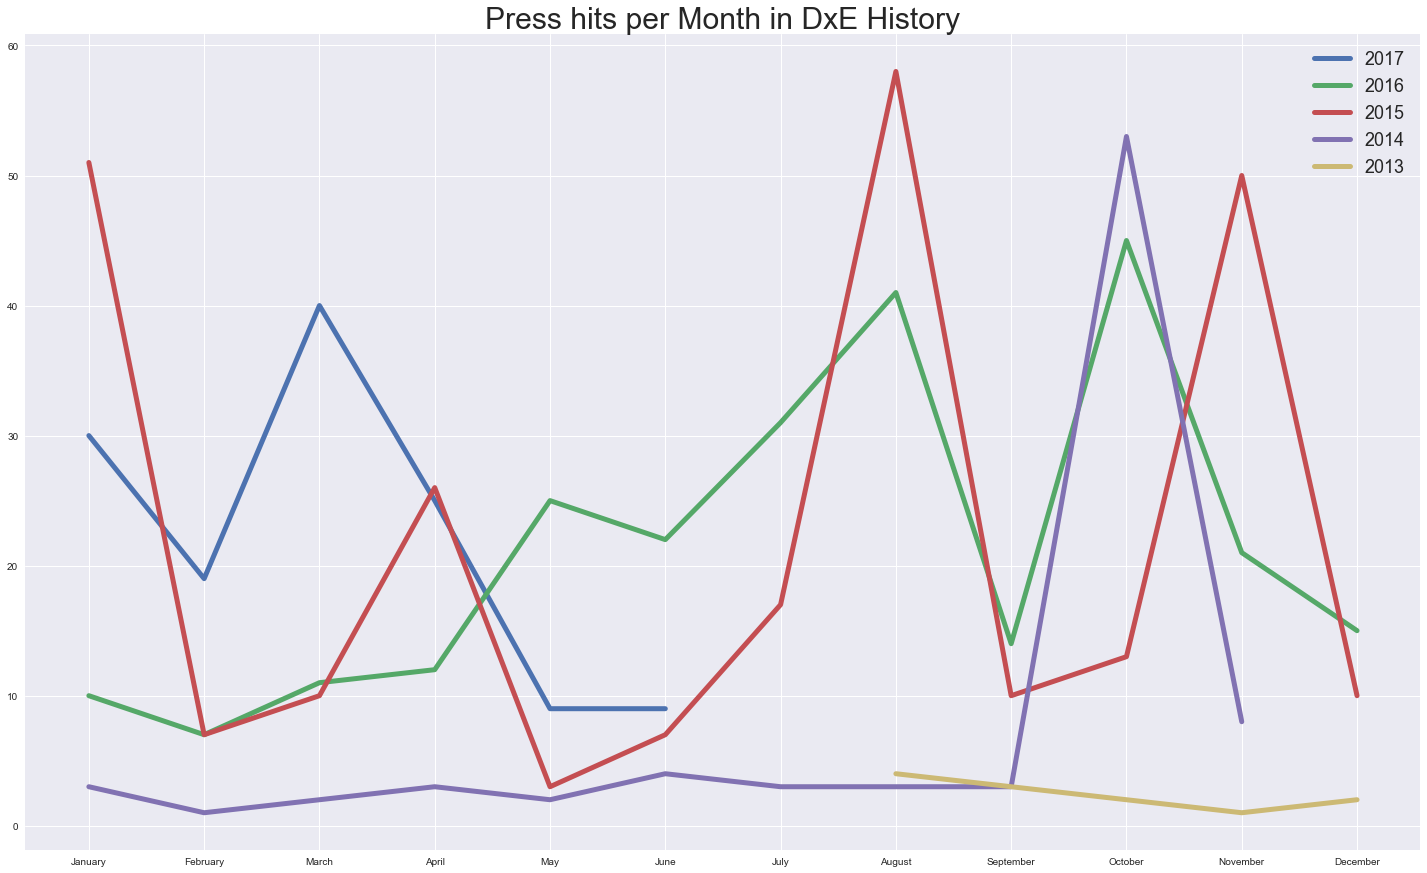

In [15]:
plt.figure(figsize=(25,15))
plt.plot(press_hits_17, label="2017", linewidth=5.0)
plt.plot(press_hits_16, label="2016", linewidth=5.0)
plt.plot(press_hits_15, label="2015", linewidth=5.0)
plt.plot(press_hits_14, label="2014", linewidth=5.0)
plt.plot(press_hits_13, label="2013", linewidth=5.0)
plt.legend(prop={'size':18})


plt.xticks(months, my_xticks)
plt.rcParams['xtick.labelsize'] = 15
plt.title("Press hits per Month in DxE History", fontsize=30 )


In [18]:
year_totals

,Year,Title
1,2013,7
2,2014,82
3,2015,262
4,2016,254
5,2017,132
